# Gentrification in New Orleans - Leah Kuperman and Leo Simanonok

https://leosimanonok.github.io/DataScienceFinalTutorial/

## Milestone 2
    
&nbsp;&nbsp;&nbsp;&nbsp;Throughout the past decade, data science has emerged as a leading field of study and industry. Data analysis has become critical in tackling societal problems and 
tracking certain trends in order to arrive at informed, logical solutions. For our final project, we have decided to study New Orleans income and property data 
to identify the prevalence of gentrification in different neighborhoods. As Tulane students, it is easy to become trapped in the uptown bubble and forget about the 
impact we have on the rest of the city’s people, economy, and culture. It is no secret that New Orleans as a whole is a victim of gentrification. Part of what makes 
the city so unique is its rich history and resilience, something to which none of the 13,000 people from out of state who have moved here from 2012-2016 can bear 
witness. That being said, our goal for this project is to find meaningful insights in our datasets which we can offer to our partners, hopefully inspiring positive 
changes in New Orleans.
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Initially, one of the datasets we hoped to get our hands on was property value data. Looking at housing prices would allow us take a holistic look at gentrification
and possibly track the movement of affluent people to previously poorer neighborhoods. Unfortunately, property value data is notoriously hard to collect in New 
Orleans. Because of this, the first dataset we analyzed involves poverty rates and income data. To this end, we found census data from the years 2010-2018 which estimates 
the median income and poverty rate of every county in the USA. Another dataset we decided to look into is a census tract dataset containing both racial and income data. Finally, a third dataset we are looking at analyzes similar statistics from a level of different neighborhoods in and around New Orleans. We hope to use this data in conjunction with 
the previously discussed census data in order to show how gentrification changes the make-up of neighborhoods. Ideally, we would like to show where the displaced 
citizens moved after their neighborhoods were gentrified. 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;The two datasets we decided to load into our notebook for this milestone contain the average income and racial makeup for each census tract and each neighborhood. Loading this datasets 
came with a host of struggles. The biggest struggle was changing all of the column names such that they were sensical and easy to manipulate.
<br>
&nbsp;&nbsp;&nbsp;&nbsp;In terms of our meeting plan, we have set weekly meetings on Mondays at 1pm to analyze our progress and plan for any upcoming due dates or milestones. Depending on 
our availability and wellbeing, we have decided to meet in person in the library to avoid technological complications. In the event that we need to meet virtually, we will maintain these meeting times via Zoom. For any code we are writing for the final project, we will do so in our private GitHub repo attached to our final project page. We have already established that both of us are able to connect, pull, and push to it from our local machines.

## References/Links
https://www.census.gov/programs-surveys/saipe/data/api.html<br>
https://www.census.gov/data/datasets/time-series/demo/saipe/model-tables.html<br>
https://www.datacenterresearch.org/reports_analysis/placing-prosperity/<br>
https://richcampanella.com/wp-content/uploads/2020/02/article_Campanella_300-Years-of-Human-Geography-in-New-Orleans.pdf<br>
https://www.nytimes.com/2019/08/27/opinion/new-orleans.html <br>
https://data.census.gov/cedsci/

Original data can be found on our github page in ~/Data

In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')#style change
%matplotlib inline
pd.options.mode.chained_assignment = None #ignore warnings
pd.options.display.float_format = '{:.4f}'.format #display in non-scientific notation

**Source** <br>
Original data tables can be found by searching for "race" and "income" at https://data.census.gov/cedsci/ and the filtering to only include census tracts in orleans parish.

In [3]:
df = pd.read_csv("./Data/productDownload_2020-10-23T150453/ACSDP5Y2010.DP05_data_with_overlays_2020-10-23T150427.csv", skiprows = 1)

In [4]:
# change names of columns I want to keep, and then make them into new df
clean_df = df.rename(columns = {
    "id" : "Geo_ID",
    "Geographic Area Name" : "Census Tract",
    "Estimate!!SEX AND AGE!!Total population" : "Total Population",
    "Estimate!!RACE!!One race!!White" : "White",
    "Estimate!!RACE!!One race!!Black or African American" : "Black",
    "Estimate!!RACE!!One race!!American Indian and Alaska Native" : "American Indian and Alask Native",
    "Estimate!!RACE!!One race!!Asian" : "Asian",
    "Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander" : "Native Hawaiian and Other Pacific Islander",
    "Estimate!!RACE!!One race!!Some other race" : "Other"
    
    

    
    
})
clean_df = clean_df[["Geo_ID", "Census Tract", "Total Population", "White", "Black", "American Indian and Alask Native",
                   "Asian", "Native Hawaiian and Other Pacific Islander", "Other"]]

# get rid of extra characters from census tract column
clean_df["Census Tract"] = clean_df["Census Tract"].map(lambda x: x.lstrip('Census Tract').rstrip('Orleans Parish, Louisiana'))
clean_df["Year"] = 2010

In [5]:
# get all race data into one df
all_clean_race_df = clean_df

for i in range(2011, 2019):
    year = str(i)
    fileName = "./Data/productDownload_2020-10-23T150453/ACSDP5Y" + year + ".DP05_data_with_overlays_2020-10-23T150427.csv"
    df = pd.read_csv(fileName, skiprows=1)
    new_df = df.rename(columns = {
        "id" : "Geo_ID",
        "Geographic Area Name" : "Census Tract",
        "Estimate!!SEX AND AGE!!Total population" : "Total Population",
        "Estimate!!RACE!!One race!!White" : "White",
        #different names in different tables
        "Estimate!!RACE!!Total population!!One race!!White" : "White",
        "Estimate!!RACE!!One race!!Black or African American" : "Black",
        "Estimate!!RACE!!Total population!!One race!!Black or African American" : "Black",
        "Estimate!!RACE!!One race!!American Indian and Alaska Native" : "American Indian and Alask Native",
        "Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native" : "American Indian and Alask Native",
        "Estimate!!RACE!!One race!!Asian" : "Asian",
        "Estimate!!RACE!!Total population!!One race!!Asian" : "Asian",
        "Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander" : "Native Hawaiian and Other Pacific Islander",
        "Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander" : "Native Hawaiian and Other Pacific Islander",
        "Estimate!!RACE!!One race!!Some other race" : "Other",
        "Estimate!!RACE!!Total population!!One race!!Some other race" : "Other"
    })
    # keep race data
    new_df = new_df[["Geo_ID", "Census Tract", "Total Population", "White", "Black", "American Indian and Alask Native", "Asian", "Native Hawaiian and Other Pacific Islander", "Other"]]
    # get rid of words in census tract column
    new_df["Census Tract"] = new_df["Census Tract"].map(lambda x: x.lstrip('Census Tract').rstrip('Orleans Parish, Louisiana'))
    new_df["Year"] = i
    all_clean_race_df = pd.concat([all_clean_race_df, new_df], ignore_index=True)
    

In [6]:
print(all_clean_race_df.dtypes)

Geo_ID                                        object
Census Tract                                  object
Total Population                               int64
White                                          int64
Black                                          int64
American Indian and Alask Native               int64
Asian                                          int64
Native Hawaiian and Other Pacific Islander     int64
Other                                          int64
Year                                           int64
dtype: object


Here we show all the data from one census tract.

In [7]:
all_clean_race_df[all_clean_race_df["Census Tract"] == "65"]

,Geo_ID,Census Tract,Total Population,White,Black,American Indian and Alask Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Year
3,1400000US22071006500,65,2126,933,1031,8,0,22,102,2010
283,1400000US22071006500,65,2315,1181,840,14,36,46,134,2011
460,1400000US22071006500,65,2569,1398,844,17,32,53,116,2012
569,1400000US22071006500,65,2620,1500,740,10,38,37,209,2013
862,1400000US22071006500,65,2679,1627,802,0,40,26,94,2014
943,1400000US22071006500,65,2761,1782,772,0,35,0,116,2015
1168,1400000US22071006500,65,2709,1785,741,0,27,0,97,2016
1292,1400000US22071006500,65,2782,1712,899,0,28,0,101,2017
1522,1400000US22071006500,65,2762,1631,905,0,23,0,128,2018


In [8]:
all_clean_race_df.describe()

,Total Population,White,Black,American Indian and Alask Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Year
count,1593.0000,1593.0000,1593.0000,1593.0000,1593.0000,1593.0000,1593.0000,1593.0000
mean,2022.0182,685.0653,1209.6598,5.1739,59.7797,1.0904,29.2906,2014.0000
std,1130.9134,737.3528,1108.6618,17.3747,198.2898,9.8894,52.9918,2.5828
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2010.0000
25%,1317.0000,90.0000,404.0000,0.0000,0.0000,0.0000,0.0000,2012.0000
50%,1748.0000,387.0000,941.0000,0.0000,8.0000,0.0000,8.0000,2014.0000
75%,2482.0000,1160.0000,1595.0000,4.0000,43.0000,0.0000,33.0000,2016.0000
max,7381.0000,3694.0000,6812.0000,254.0000,2107.0000,211.0000,521.0000,2018.0000


Now we'll save this dataframe as a csv, so that we can skip all this cleaning in the future.

In [9]:
all_clean_race_df.to_csv("./cleaned_race_data.csv")

Now we will clean the income dataset.

In [10]:
df = pd.read_csv("./Data/productDownload_2020-10-23T151012/ACSST5Y2010.S1901_data_with_overlays_2020-10-23T150937.csv", skiprows=1)

Here we clean the dataset with the 2010 data, so that we can concatenate the other years on after.

In [11]:
clean_df = df.rename(columns = {
    "id" : "Geo_ID",
    "Geographic Area Name" : "Census Tract",
    #households or families?
    "Households!!Estimate!!Total" : "Households",
    "Households!!Estimate!!Less than $10,000" : "Households less than $\$$10,000",
    "Households!!Estimate!!$10,000 to $14,999" : "Households $\$$10,000 to $\$$14,999",
    "Households!!Estimate!!$15,000 to $24,999" : "Households $\$$15,000 to $\$$24,999",
    "Households!!Estimate!!$25,000 to $34,999" : "Households $\$$25,000 to $\$$34,999",
    "Households!!Estimate!!$35,000 to $49,999" : "Households $\$$35,000 to $\$$49,999",
    "Households!!Estimate!!$50,000 to $74,999" : "Households $\$$50,000 to $\$$74,999",
    "Households!!Estimate!!$75,000 to $99,999" : "Households $\$$75,000 to $\$$99,999",
    "Households!!Estimate!!$100,000 to $149,999" : "Households $\$$100,000 to $\$$149,999",
    "Households!!Estimate!!$150,000 to $199,999" : "Households $\$$150,000 to $\$$199,999",
    "Households!!Estimate!!$200,000 or more" : "Households $\$$200,000 or more",
    "Households!!Estimate!!Median income (dollars)" : "Household median income (dollars)",
    "Households!!Estimate!!Mean income (dollars)" : "Household mean income (dollars)",
})

clean_df = clean_df[["Geo_ID", "Census Tract", "Households", "Households less than $\$$10,000", "Households $\$$10,000 to $\$$14,999",
                    "Households $\$$15,000 to $\$$24,999", "Households $\$$25,000 to $\$$34,999", "Households $\$$35,000 to $\$$49,999",
                    "Households $\$$50,000 to $\$$74,999", "Households $\$$75,000 to $\$$99,999", "Households $\$$100,000 to $\$$149,999",
                     "Households $\$$150,000 to $\$$199,999", "Households $\$$200,000 or more", "Household median income (dollars)",
                     "Household mean income (dollars)"]]
clean_df.replace(to_replace="-", value=np.nan, inplace=True)
clean_df.replace(to_replace="N", value=np.nan, inplace=True)
clean_df = clean_df.astype({
        "Households" : "int64",
        "Households less than $\$$10,000" :  "float64",
        "Households $\$$10,000 to $\$$14,999" : "float64",
        "Households $\$$15,000 to $\$$24,999" : "float64",
        "Households $\$$25,000 to $\$$34,999" : "float64",
        "Households $\$$35,000 to $\$$49,999" : "float64",
        "Households $\$$50,000 to $\$$74,999" : "float64",
        "Households $\$$75,000 to $\$$99,999" : "float64", 
        "Households $\$$100,000 to $\$$149,999" : "float64",
        "Households $\$$150,000 to $\$$199,999" : "float64", 
        "Households $\$$200,000 or more" : "float64",
        "Household median income (dollars)" : "float64",
        "Household mean income (dollars)" : "float64"
    })

clean_df["Census Tract"] = clean_df["Census Tract"].map(lambda x: x.lstrip('Census Tract').rstrip('Orleans Parish, Louisiana'))
clean_df["Year"] = 2010      

Now we'll add all the other years.

In [12]:
all_clean_income_df = clean_df

for i in range(2011, 2019):
    year = str(i)
    fileName = "./Data/productDownload_2020-10-23T151012/ACSST5Y" + year + ".S1901_data_with_overlays_2020-10-23T150937.csv"
    df = pd.read_csv(fileName, skiprows=1)
    new_df = df.rename(columns = {
        "id" : "Geo_ID",
        "Geographic Area Name" : "Census Tract",
        #households or families?
        "Households!!Estimate!!Total" : "Households",
        #different starting in 2017
        "Estimate!!Households!!Total" : "Households",
        "Households!!Estimate!!Less than $10,000" : "Households less than $\$$10,000",
        "Estimate!!Households!!Total!!Less than $10,000" : "Households less than $\$$10,000",
        "Households!!Estimate!!$10,000 to $14,999" : "Households $\$$10,000 to $\$$14,999",
        "Estimate!!Households!!Total!!$10,000 to $14,999" : "Households $\$$10,000 to $\$$14,999",
        "Households!!Estimate!!$15,000 to $24,999" : "Households $\$$15,000 to $\$$24,999",
        "Estimate!!Households!!Total!!$15,000 to $24,999" : "Households $\$$15,000 to $\$$24,999",
        "Households!!Estimate!!$25,000 to $34,999" : "Households $\$$25,000 to $\$$34,999",
        "Estimate!!Households!!Total!!$25,000 to $34,999" : "Households $\$$25,000 to $\$$34,999",
        "Households!!Estimate!!$35,000 to $49,999" : "Households $\$$35,000 to $\$$49,999",
        "Estimate!!Households!!Total!!$35,000 to $49,999" : "Households $\$$35,000 to $\$$49,999",
        "Households!!Estimate!!$50,000 to $74,999" : "Households $\$$50,000 to $\$$74,999",
        "Estimate!!Households!!Total!!$50,000 to $74,999" : "Households $\$$50,000 to $\$$74,999",
        "Households!!Estimate!!$75,000 to $99,999" : "Households $\$$75,000 to $\$$99,999",
        "Estimate!!Households!!Total!!$75,000 to $99,999" : "Households $\$$75,000 to $\$$99,999",
        "Households!!Estimate!!$100,000 to $149,999" : "Households $\$$100,000 to $\$$149,999",
        "Estimate!!Households!!Total!!$100,000 to $149,999" : "Households $\$$100,000 to $\$$149,999",
        "Households!!Estimate!!$150,000 to $199,999" : "Households $\$$150,000 to $\$$199,999",
        "Estimate!!Households!!Total!!$150,000 to $199,999" : "Households $\$$150,000 to $\$$199,999",
        "Households!!Estimate!!$200,000 or more" : "Households $\$$200,000 or more",
        "Estimate!!Households!!Total!!$200,000 or more" : "Households $\$$200,000 or more",
        "Households!!Estimate!!Median income (dollars)" : "Household median income (dollars)",
        "Estimate!!Households!!Median income (dollars)" : "Household median income (dollars)",
        "Households!!Estimate!!Mean income (dollars)" : "Household mean income (dollars)",
        "Estimate!!Households!!Mean income (dollars)" : "Household mean income (dollars)",
    })

    new_df = new_df[["Geo_ID", "Census Tract", "Households", "Households less than $\$$10,000", "Households $\$$10,000 to $\$$14,999",
                    "Households $\$$15,000 to $\$$24,999", "Households $\$$25,000 to $\$$34,999", "Households $\$$35,000 to $\$$49,999",
                    "Households $\$$50,000 to $\$$74,999", "Households $\$$75,000 to $\$$99,999", "Households $\$$100,000 to $\$$149,999",
                     "Households $\$$150,000 to $\$$199,999", "Households $\$$200,000 or more", "Household median income (dollars)",
                     "Household mean income (dollars)"]]
    # replace "-" with np.nan
    new_df.replace(to_replace="-", value=np.nan, inplace=True)
    new_df.replace(to_replace="N", value=np.nan, inplace=True)
    new_df = new_df.astype({
        "Households" : "int64",
        "Households less than $\$$10,000" :  "float64",
        "Households $\$$10,000 to $\$$14,999" : "float64",
        "Households $\$$15,000 to $\$$24,999" : "float64",
        "Households $\$$25,000 to $\$$34,999" : "float64",
        "Households $\$$35,000 to $\$$49,999" : "float64",
        "Households $\$$50,000 to $\$$74,999" : "float64",
        "Households $\$$75,000 to $\$$99,999" : "float64", 
        "Households $\$$100,000 to $\$$149,999" : "float64",
        "Households $\$$150,000 to $\$$199,999" : "float64", 
        "Households $\$$200,000 or more" : "float64",
        "Household median income (dollars)" : "float64",
        "Household mean income (dollars)" : "float64"
    })
    new_df["Census Tract"] = new_df["Census Tract"].map(lambda x: x.lstrip('Census Tract').rstrip('Orleans Parish, Louisiana'))
    new_df["Year"] = i
    all_clean_income_df = pd.concat([all_clean_income_df, new_df], ignore_index=True)

In [13]:
all_clean_income_df.dtypes

Geo_ID                                    object
Census Tract                              object
Households                                 int64
Households less than $\$$10,000          float64
Households $\$$10,000 to $\$$14,999      float64
Households $\$$15,000 to $\$$24,999      float64
Households $\$$25,000 to $\$$34,999      float64
Households $\$$35,000 to $\$$49,999      float64
Households $\$$50,000 to $\$$74,999      float64
Households $\$$75,000 to $\$$99,999      float64
Households $\$$100,000 to $\$$149,999    float64
Households $\$$150,000 to $\$$199,999    float64
Households $\$$200,000 or more           float64
Household median income (dollars)        float64
Household mean income (dollars)          float64
Year                                       int64
dtype: object

We weren't sure if we should change census tract to a float or just leave it. It's a catagorical variable, and so addition/multiplication of values don't really make sense. Also, note that all the household values are percentages, which is why they are floats and not ints. Next we'll show all the data for one census tract.

In [14]:
all_clean_income_df[all_clean_income_df["Census Tract"] == "65"]

,Geo_ID,Census Tract,Households,"Households less than $\$$10,000","Households $\$$10,000 to $\$$14,999","Households $\$$15,000 to $\$$24,999","Households $\$$25,000 to $\$$34,999","Households $\$$35,000 to $\$$49,999","Households $\$$50,000 to $\$$74,999","Households $\$$75,000 to $\$$99,999","Households $\$$100,000 to $\$$149,999","Households $\$$150,000 to $\$$199,999","Households $\$$200,000 or more",Household median income (dollars),Household mean income (dollars),Year
106,1400000US22071006500,65,937,10.8000,9.9000,17.3000,9.8000,10.2000,20.2000,12.8000,4.7000,4.3000,0.0000,37440.0000,48102.0000,2010
283,1400000US22071006500,65,1092,19.2000,9.9000,8.4000,10.9000,11.8000,16.4000,9.7000,9.1000,4.6000,0.0000,36932.0000,49805.0000,2011
460,1400000US22071006500,65,1194,15.0000,10.1000,15.7000,11.2000,9.8000,14.5000,11.7000,10.1000,2.0000,0.0000,32226.0000,46976.0000,2012
637,1400000US22071006500,65,1226,14.9000,9.8000,14.5000,11.0000,13.0000,17.5000,9.5000,8.5000,1.4000,0.0000,34817.0000,44878.0000,2013
781,1400000US22071006500,65,1184,14.9000,7.9000,14.0000,12.9000,10.5000,15.2000,13.2000,10.2000,1.0000,0.3000,35256.0000,48322.0000,2014
940,1400000US22071006500,65,1218,13.6000,5.9000,13.7000,12.3000,13.0000,15.4000,15.3000,9.6000,1.1000,0.2000,37368.0000,49714.0000,2015
1179,1400000US22071006500,65,1199,6.8000,7.9000,15.8000,11.7000,14.9000,15.8000,12.8000,12.1000,1.1000,1.1000,40040.0000,54719.0000,2016
1292,1400000US22071006500,65,1215,9.2000,7.3000,14.1000,11.5000,16.0000,11.4000,14.8000,11.2000,3.2000,1.2000,39250.0000,56894.0000,2017
1522,1400000US22071006500,65,1228,8.0000,4.7000,15.0000,11.6000,11.2000,12.0000,15.5000,14.1000,6.1000,1.9000,49000.0000,64585.0000,2018


In [15]:
all_clean_income_df.describe()

,Households,"Households less than $\$$10,000","Households $\$$10,000 to $\$$14,999","Households $\$$15,000 to $\$$24,999","Households $\$$25,000 to $\$$34,999","Households $\$$35,000 to $\$$49,999","Households $\$$50,000 to $\$$74,999","Households $\$$75,000 to $\$$99,999","Households $\$$100,000 to $\$$149,999","Households $\$$150,000 to $\$$199,999","Households $\$$200,000 or more",Household median income (dollars),Household mean income (dollars),Year
count,1593.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1550.0000,1538.0000,1541.0000,1593.0000
mean,822.6949,16.3948,8.6377,13.9172,11.0878,12.4572,13.4535,8.0021,8.1770,3.2579,4.6146,42277.8778,61060.7047,2014.0000
std,429.2883,11.0325,7.1215,7.5659,5.7345,6.8380,6.0391,5.2749,7.5664,3.8163,7.6672,26756.0555,41361.8892,2.5828
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8071.0000,5952.0000,2010.0000
25%,554.0000,8.3000,4.0000,8.2000,7.1000,8.6000,9.3000,4.0000,2.7000,0.0000,0.0000,23804.7500,34035.0000,2012.0000
50%,766.0000,14.5000,7.8000,13.8000,10.8000,12.1000,13.3000,7.6000,6.8000,1.9000,1.3000,34419.5000,46846.0000,2014.0000
75%,1017.0000,22.4750,11.7000,18.8000,14.4000,15.6000,17.4000,11.3000,12.4000,5.3000,5.5000,54058.2500,75994.0000,2016.0000
max,2663.0000,100.0000,100.0000,59.2000,50.6000,100.0000,32.2000,40.3000,100.0000,19.7000,44.6000,175000.0000,284778.0000,2018.0000


Finally we export to csv, so we dont have to do all of this every time.

In [16]:
all_clean_income_df.to_csv("./Data/cleaned_income_data.csv")

 # Exploratory Data Analysis

In [17]:
race_df = pd.read_csv("./Data/cleaned_race_data.csv", index_col=0)
income_df = pd.read_csv("./Data/cleaned_income_data.csv", index_col=0)

We'll start by joining the two datasets on year and census tract.

In [18]:
combined_df = race_df.merge(income_df, on=["Census Tract", "Year"], how="inner")

Next, we want to show how one census tract has changed from 2010 to 2018.

In [19]:
combined_df = combined_df.loc[combined_df["Census Tract"] == 45]
combined_df["Percent White"] = combined_df["White"] / combined_df["Total Population"]
combined_df["Percent Black"] = combined_df["Black"] / combined_df["Total Population"]

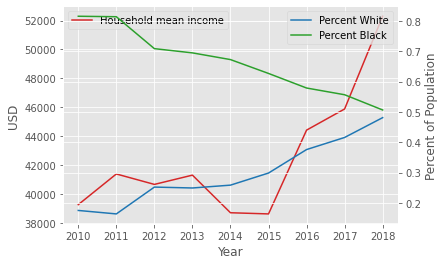

In [20]:
fig, ax = plt.subplots()
color = "tab:red"
ax.set_xlabel("Year")
ax.legend("Household mean income")
ax.set_ylabel("USD")
ax.plot(combined_df["Year"], combined_df["Household mean income (dollars)"], color=color, label="Household mean income")
ax.legend()

ax1 = ax.twinx()
color = "tab:blue"
ax1.set_ylabel("Percent of Population")
ax1.plot(combined_df["Year"], combined_df["Percent White"], color = color, label="Percent White")
ax1.legend()

ax2 = ax1
color = "tab:green"
ax2.plot(combined_df["Year"], combined_df["Percent Black"], color = color, label="Percent Black")
ax2.legend()

plt.show()

This graph shows how mean household income has changed for this census tract between 2010 and 2018. It also shows how the composition of the census tract has changed within the same time period. This sort of comparison will allow us to identify which census tracts have changed the most in terms of these two variables in the given timeframe. 

In [21]:
scatter_df = race_df.merge(income_df, on=["Census Tract", "Year"], how="inner")
scatter_df["Percent White"] = scatter_df["White"] / scatter_df["Total Population"]
scatter_df["Percent Black"] = scatter_df["Black"] / scatter_df["Total Population"]

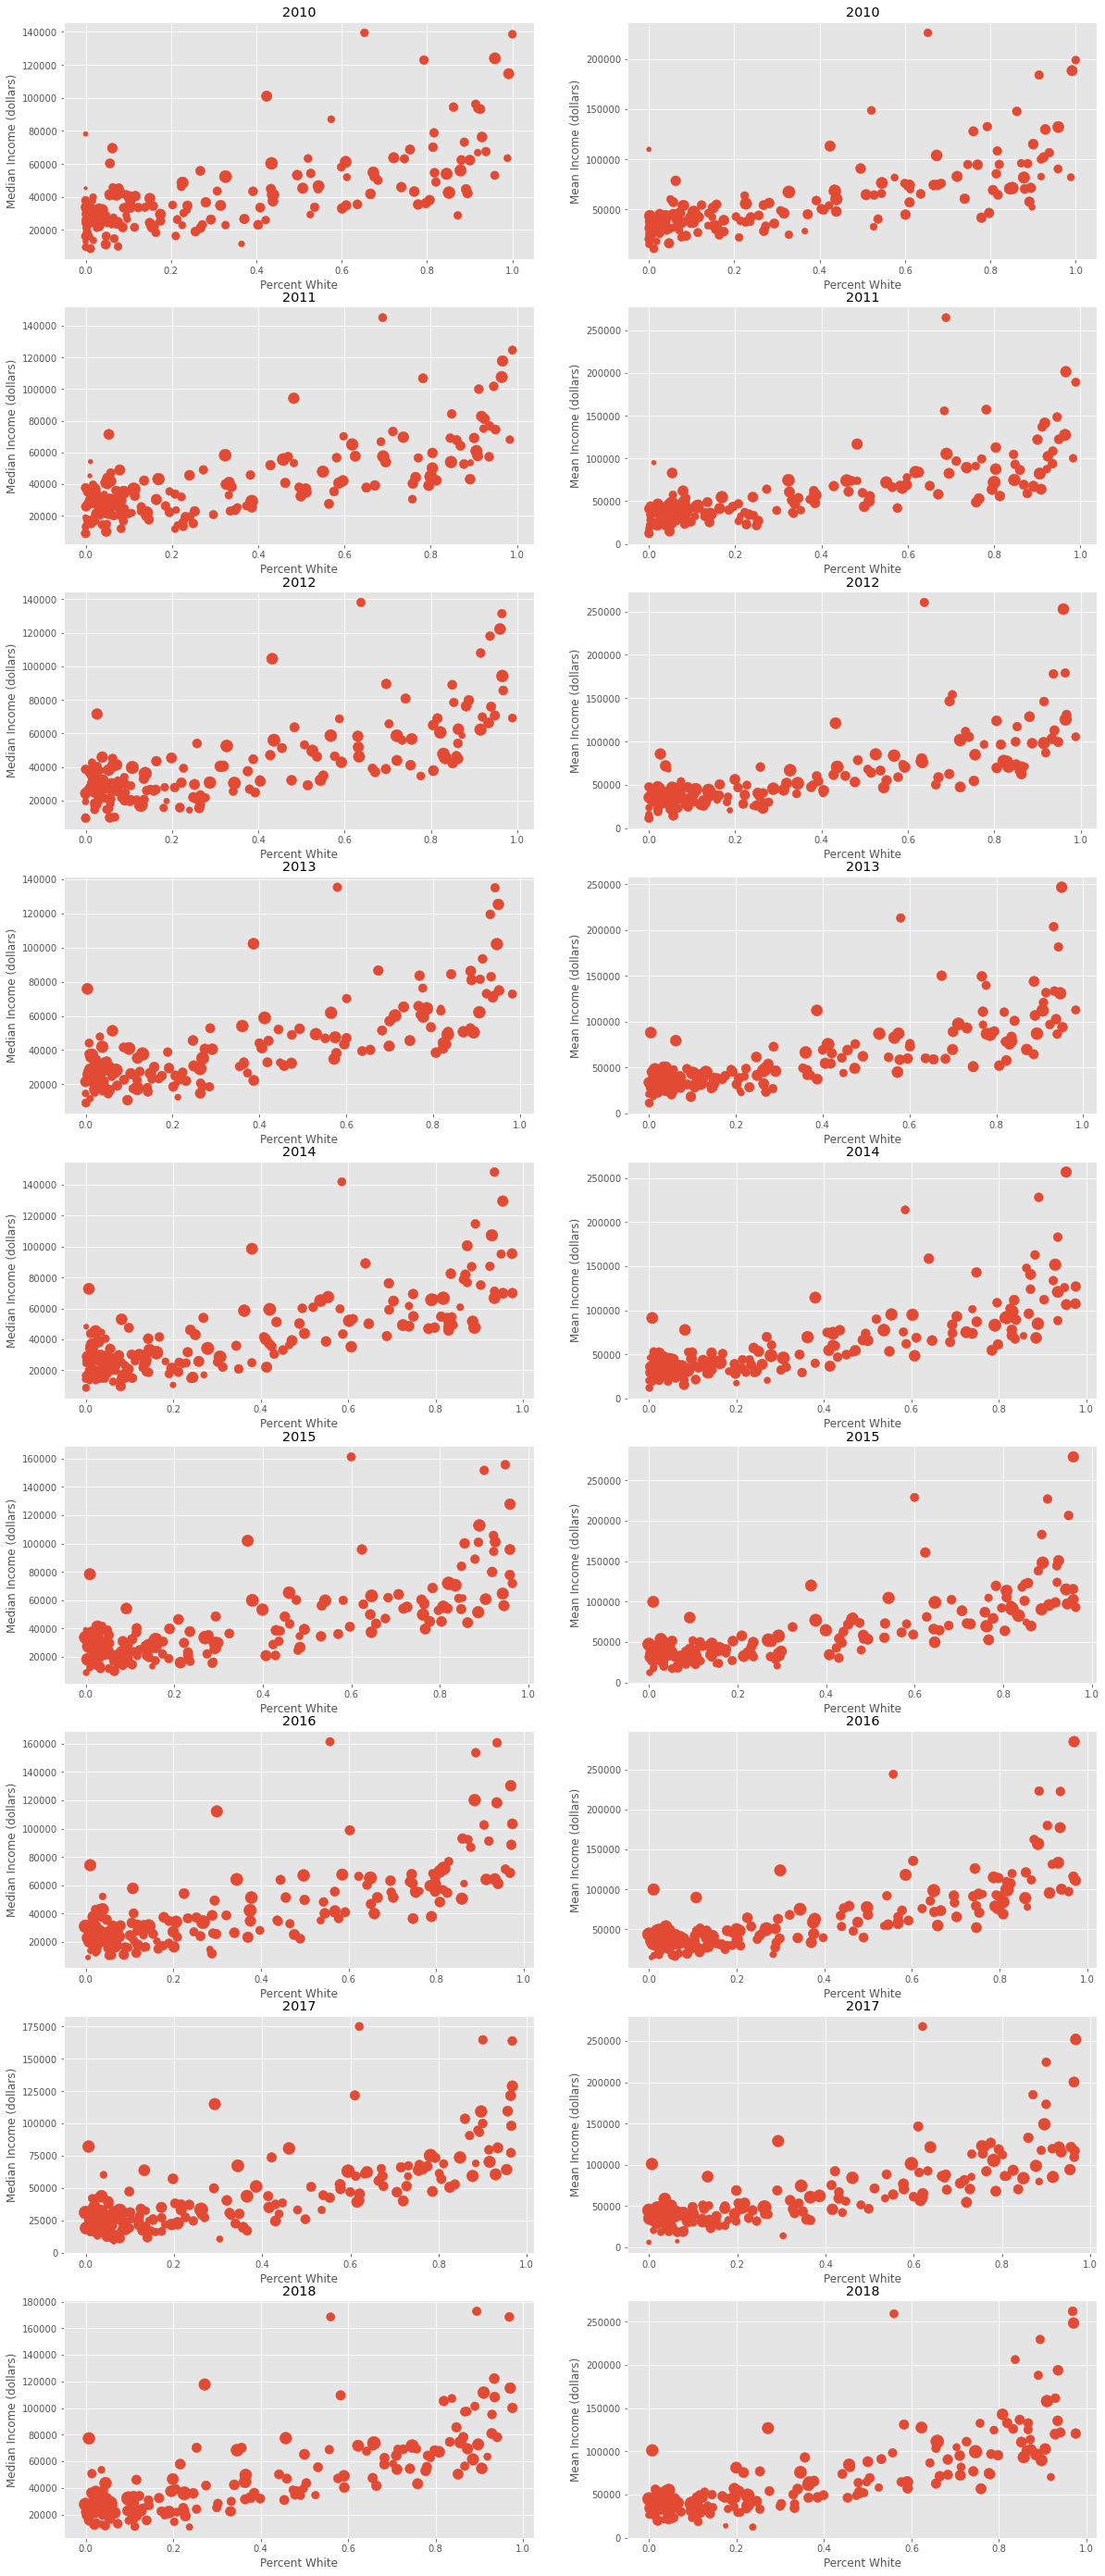

In [22]:
fig, axs = plt.subplots(nrows=9, ncols=2)
fig.set_figheight(50)
fig.set_figwidth(20)

for i in range(0, 9):
    ax_med = axs[i][0]
    year = 2010 + i
    ax_med.set_xlabel("Percent White")
    ax_med.set_ylabel("Median Income (dollars)")
    ax_med.set_title(str(year))
    x = scatter_df.loc[scatter_df["Year"] == year] ["Percent White"]
    y = scatter_df.loc[scatter_df["Year"] == year] ["Household median income (dollars)"]
    s = scatter_df.loc[scatter_df["Year"] == year] ["Households"] ** 0.7
    ax_med.scatter(x, y, s)
    
    ax_mean = axs[i][1]
    year = 2010 + i
    ax_mean.set_xlabel("Percent White")
    ax_mean.set_ylabel("Mean Income (dollars)")
    ax_mean.set_title(str(year))
    x = scatter_df.loc[scatter_df["Year"] == year] ["Percent White"]
    y = scatter_df.loc[scatter_df["Year"] == year] ["Household mean income (dollars)"]
    s = scatter_df.loc[scatter_df["Year"] == year] ["Households"] ** 0.7 
    ax_mean.scatter(x, y, s)
    

This plot shows how the median and mean income is related to race in each census tract. The size of each dot is related to the number of households in the census tract. I couldn't get this to work super well. I think all of the tracts are relatively close in size, which makes sense. 

In [23]:
variables = ["Percent White", "Percent Black", "Household median income (dollars)", "Household mean income (dollars)"]
scatter_df[variables].corr()

,Percent White,Percent Black,Household median income (dollars),Household mean income (dollars)
Percent White,1.0000,-0.9712,0.7290,0.7525
Percent Black,-0.9712,1.0000,-0.7226,-0.7437
Household median income (dollars),0.7290,-0.7226,1.0000,0.9439
Household mean income (dollars),0.7525,-0.7437,0.9439,1.0000


The racial composition of the census tract is closely corrolated to both the mean and median household income. 

# Looking into Another Dataset
**Source:** The Data Center analysis of data from U.S. Census 2000 Summary File 1 (SF1) and 2014-2018 American Community Survey. These data tables support Neighborhood Statistical Area Data Profiles. This includes 252 data points for all 72 neighborhood statistical areas, with New Orleans and United States comparisons. Data originates from Census 2000 and 2010, American Community Survey 2014–2018, and 2017 Local Employment Dynamics data — including housing and housing costs, income and poverty, transportation, educational attainment, language, employment, and more.

## Loading in and Cleaning the Data
My analysis utilizes a combination of three different datasets:<br><br>
`race_df`: The distribution of racial makeup for each neighborhood spanning 2000 and 2014-2018<br>
`avg_income_df`: Average household income for each neighborhood spanning 2000 and 2014-2018<br>
`avg_rent_df`: Average contract and gross rent (gross rent includes utilities) for each neighborhood in 2014-2018 only<br><br>
By combining these datasets, we can visualize the way that racial makeup plays into average household income and average rent prices.

In [24]:
#Loading in another dataset
xls = pd.ExcelFile("./Data/Neighborhood profiles data tables.xlsx")

#import and clean racial distribution dataset
race_df = pd.read_excel(xls, "Table 4", skiprows = 11)
race_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", "Unnamed: 16", "Unnamed: 20", 
                        "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", "MOE.6", 
                        "2000.4", "2014-2018.4"], inplace=True)
race_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Black in 2000", 
    "2014-2018" : "Percent Black in 2014-2018",
    "2000.1" : "Percent White in 2000", 
    "2014-2018.1" : "Percent White in 2014-2018",
    "2000.2" : "Percent Asian in 2000", 
    "2014-2018.2" : "Percent Asian in 2014-2018",
    "2000.3" : "Percent American Indian in 2000", 
    "2014-2018.3" : "Percent American Indian in 2014-2018",
    "2000.5" : "Percent Hispanic in 2000", 
    "2013-2017" : "Percent Hispanic in 2013-2017",
    "2000.6" : "Percent Other in 2000", 
    "2013-2017.1" : "Percent Other in 2013-2017"
    }, inplace = True)

race_df = race_df.replace('NaN%', 0)
race_df.dropna(inplace=True)
race_df["Percent Black in 2014-2018"] = race_df["Percent Black in 2014-2018"].astype(float)
race_df["Percent White in 2014-2018"] = race_df["Percent White in 2014-2018"].astype(float)
race_df["Percent Asian in 2014-2018"] = race_df["Percent Asian in 2014-2018"].astype(float)
race_df["Percent American Indian in 2014-2018"] = \
                        race_df["Percent American Indian in 2014-2018"].astype(float)
race_df["Percent Hispanic in 2013-2017"] = race_df["Percent Hispanic in 2013-2017"].astype(float)
race_df["Percent Other in 2013-2017"] = race_df["Percent Other in 2013-2017"].astype(float)

#Import and clean average household income data
avg_income_df = pd.read_excel(xls, "Table 14", skiprows = 11)
avg_income_df.drop(columns='MOE', inplace=True)
avg_income_df.rename(columns = {'Unnamed: 0':'Neighborhood', 2000 : "Avg Household Income in 2000", 
    "2014-2018" : "Avg Household Income in 2014-2018"}, inplace=True)

#Cleaning average rent data
avg_rent_df = pd.read_excel(xls, "Table 11", skiprows = 11)
avg_rent_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
avg_rent_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018" : "Avg Contract Rent in 2014-2018",
    "2014-2018.1" : "Avg Gross Rent in 2014-2018"
    }, inplace = True)

### Comparing Racial Distributions in 2000 vs 2014-2018
For this visualization, I decided to compare the racial makeup of 10 neighborhoods in New Orleans using the data from 2000 and from 2014-2018. I chose the 10 neighborhoods by calculating those in which neighborhoods which experienced the largest increase in percentage of white residents between the two time periods. <br>
To do so, I created two separate dataframes for the different time periods and concatenated them into a dataframe called race_by_year, and calculated the change in percentage of white inhabitants between the two datapoints, sorting them descendingly and saving the indices. 

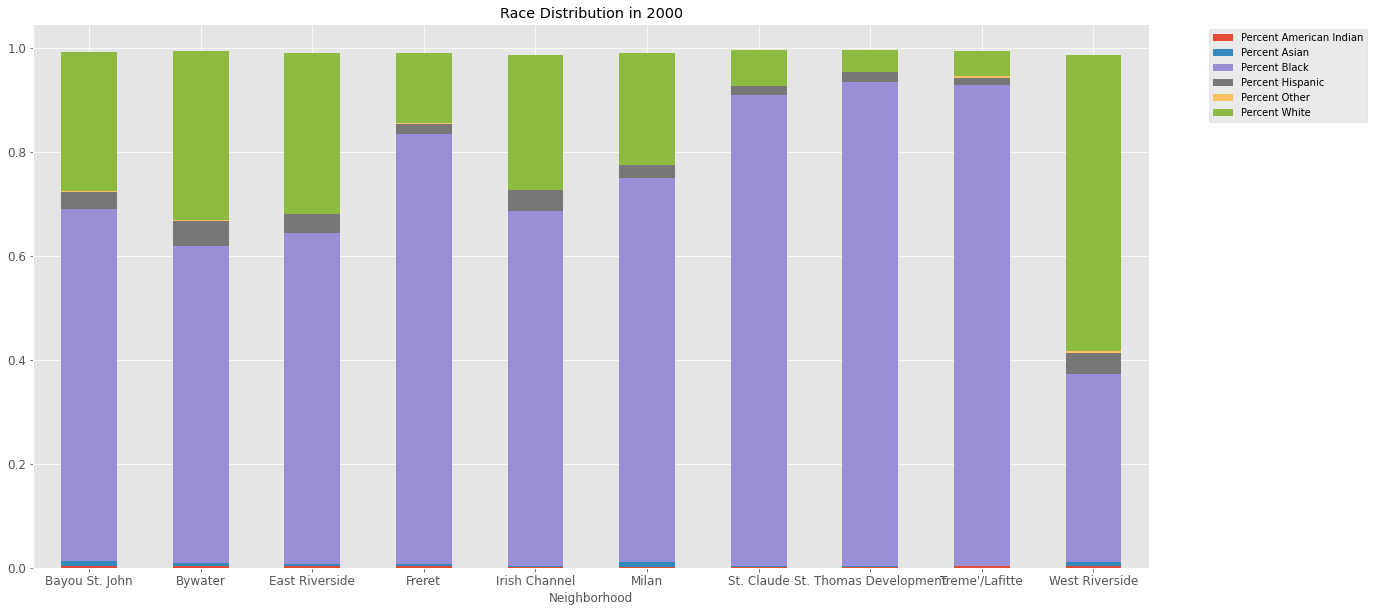

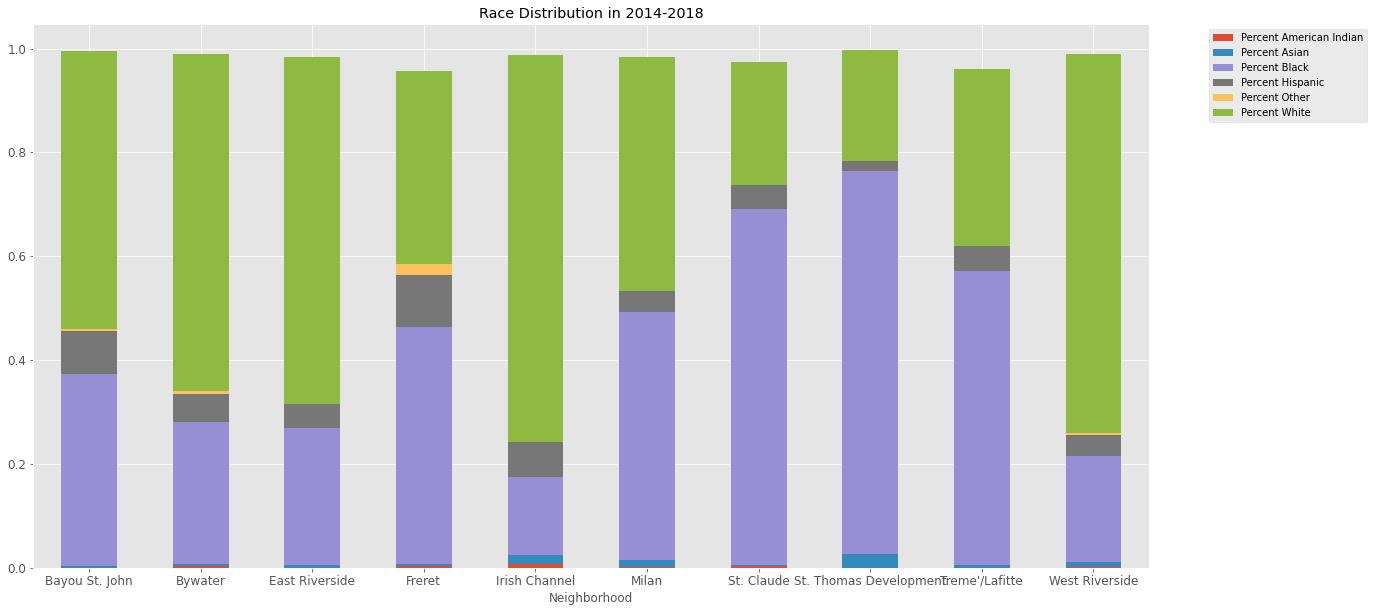

In [25]:
#Data Analysis:

#New column names:
cols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent American Indian', 
        'Percent Hispanic', 'Percent Other']

#Extract all column names ending in "2000"
race_in2000 = race_df.filter(regex='2000$',axis=1)
race_in2000.columns = cols
race_in2000['Neighborhood'] = race_df['Neighborhood']
race_in2000['Year'] = '2000'


#Extract all column names ending in "201_"
race_in2018 = race_df.filter(regex='201.$',axis=1)
race_in2018.columns = cols
race_in2018['Neighborhood'] = race_df['Neighborhood']
race_in2018['Year'] = '2014-2018'

#combine the two dfs
race_by_year = pd.concat([race_in2000, race_in2018])


#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

#Subtract most recent data from old data
race_by_year['Change in White'] = race_in2018['Percent White'] - race_in2000['Percent White']

#Sort values ascendingly and save indexes of the first 10 values
# **Note: head is set to 20 because there are duplicate values
idxs = list(race_by_year['Change in White'].sort_values(ascending=False).head(20).to_dict().keys())

#Save the 10 neighborhoods with the highest increase in population of white people
highest_change = race_by_year.iloc[idxs]['Neighborhood'].tolist()

#Create subsets for each of the years for comparison
subset_2000 = race_in2000[race_df.Neighborhood.isin(highest_change)]
subset_2018 = race_in2018[race_df.Neighborhood.isin(highest_change)]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
subset_2000.pivot_table(index='Neighborhood', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2000'
                                        ).legend(bbox_to_anchor=(1.2, 1))

subset_2018.pivot_table(index='Neighborhood', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2014-2018'
                                        ).legend(bbox_to_anchor=(1.2, 1))


This visualization simply demonstrates how drastically the shift in demographic was moving from 2000 to 2018 in this sample set of New Orleans neighborhoods. These large demographic changes in only a span of a few years are likely due to gentrification in New Orleans. We can utilize these results along with other neighborhood information to determine the areas experiencing the most impact.

### Comparing Correlation Between Average Household Income and Race in 2000 and 2014-2018
For this visualization, I decided to compare the correlation between the racial makeup of each neighborhood in the dataset and its average household income. <br>
To do so, I merged the dataset of racial makeup with that of average income and found the correlation. I then filtered out all of the columns for each respective year and created two datasets: `race_income_2000` and `race_income_2018` which each contain the relationship between the two variables for that year only. Finally, I plotted it so that the positive and negative correlations are clear.

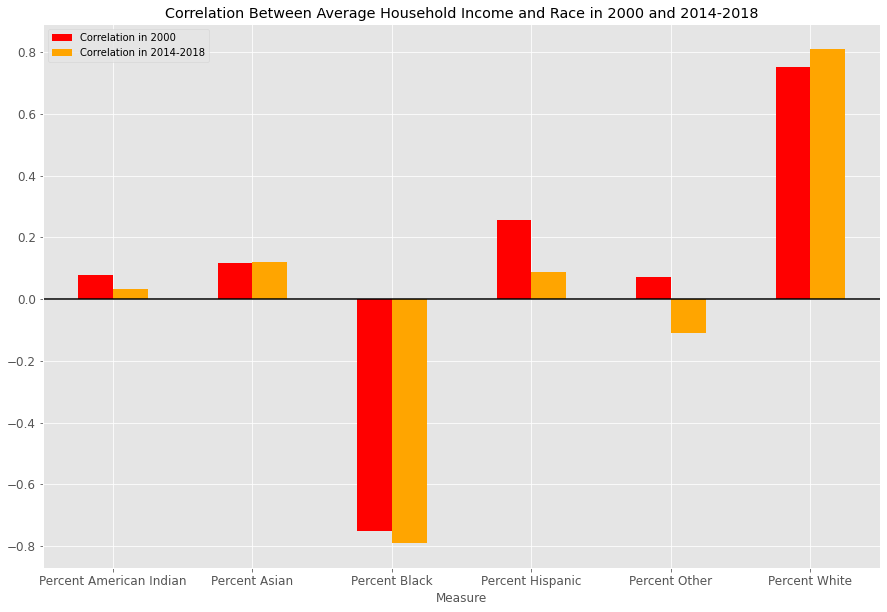

In [34]:
#Create dataframe comparing race and income
race_income = avg_income_df.merge(race_df, how='outer', on='Neighborhood')

#filter out datasets into 2000 and 2014-2018
race_income_2000 = race_df.filter(regex='2000$',axis=1)
race_income_2000.columns = cols
race_income_2000['Neighborhood'] = race_df['Neighborhood']
race_income_2000['Year'] = '2000'
race_income_2000['Avg Household Income'] = race_income['Avg Household Income in 2000']

race_income_2018 = race_df.filter(regex='201.$',axis=1)
race_income_2018.columns = cols
race_income_2018['Neighborhood'] = race_df['Neighborhood']
race_income_2018['Year'] = '2014-2018'
race_income_2018['Avg Household Income'] = race_income['Avg Household Income in 2014-2018'].replace(
                                                                                '$NaN', np.nan).dropna()

#correlation dataset for 2000 and 2014-2018
corr_2000 = pd.DataFrame(race_income_2000.corr()['Avg Household Income']).reset_index()
corr_2018 = pd.DataFrame(race_income_2018.corr()['Avg Household Income']).reset_index()

#Merge the two datasets, adding a suffix for the year
corr_by_year = corr_2000.merge(corr_2018, how='outer', on='index', suffixes=('_2000', '_2014-2018'))

#Make column names more readable and drop Avg Household Inc's comparison with itself which is always 1
corr_by_year.columns = ['Measure', 'Correlation in 2000', 'Correlation in 2014-2018']
corr_by_year.drop(6, inplace=True)

#Plot the pivot table with the appropriate Labels
corr_by_year.pivot_table(index='Measure', 
                    values = ['Correlation in 2000', 'Correlation in 2014-2018']).plot.bar(
                    title='Correlation Between Average Household Income and Race in 2000 and 2014-2018', 
                    figsize=(15,10), fontsize='large', rot=0, color=['red', 'orange']).axhline(y=0, 
                                                                                        color='black')

From this graph it is very clear to see that the percentage of black residents has a very strong negative correlation with average household income. The opposite is true for white residents. I found it interesting that the general trend when moving from 2000 to 2014-2018, the prevalence of races other than white had a more negative correlation with average household income.

### Visualizing the Correlation Between Average Contract Rent and Race in 2014-2018
Similar to the previous graph, I wanted to illustrate how race is correlated with rent prices. <br>
To do so, I followed a similar process by merging the dataset of racial makeup with that of average contract rent (excluding utilities) and found the correlation. Since the dataset only has rent prices for 2014-2018, I focused on a simple correlation graph rather than a comparison. Finally, I plotted it such that the positive and negative correlations are clear.

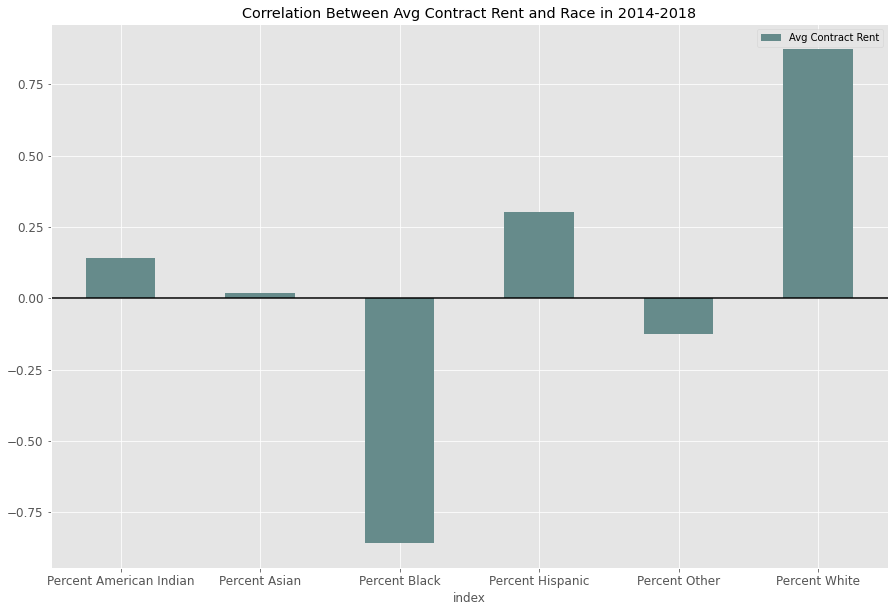

In [35]:
#Create dataframe comparing race and rent
race_rent = avg_rent_df.merge(race_df, how='outer', on='Neighborhood')

race_rent_2018 = race_df.filter(regex='201.$',axis=1)
race_rent_2018.columns = cols
race_rent_2018['Neighborhood'] = race_df['Neighborhood']
race_rent_2018['Year'] = '2014-2018'
race_rent_2018['Avg Contract Rent'] = race_rent['Avg Contract Rent in 2014-2018'].replace(
                                                                    'na', np.nan).dropna().astype(float)

#correlation dataset for 2000 and 2014-2018
corr_2018 = pd.DataFrame(race_rent_2018.corr()['Avg Contract Rent']).reset_index()


#Make column names more readable and drop Avg Household Inc's comparison with itself which is always 1
corr_2018.drop(6, inplace=True)

#Plot the pivot table with the appropriate Labels
corr_2018.pivot_table(index='index', 
                    values = ['Avg Contract Rent']).plot.bar(
                    title='Correlation Between Avg Contract Rent and Race in 2014-2018', 
                    figsize=(15,10), fontsize='large', rot=0, color='#668B8B').axhline(y=0, 
                                                                                        color='black')

From this graph it is very clear to see that the percentage of black residents has a very strong negative correlation with average rent price. The opposite is true for white residents. This is consistent with the effects of gentrification: the larger the influx of white residents into a given area, the more expensive the rent becomes.

### Comparing Average Income in 2000 vs 2014-2018
For this visualization, I simply made a boxplot showing Average Household Income in 2000 vs Average Household Income in 2014-2018 to more easily represent summary statistics for this variable.

Text(0.5, 1.0, 'Analysis of Average Household Income in 2014-2018')

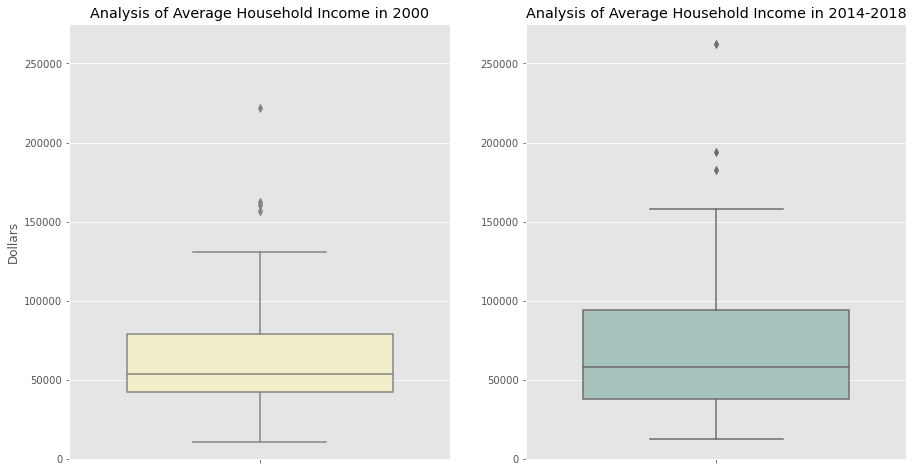

In [36]:
#Create two boxplots showing summary statistics

#Year 2000
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
p1 = sns.boxplot(data = race_income_2000, color='#f6f5c2', y = 'Avg Household Income', width=.7)
p1.set_ylim(0, 275000)
p1.set_ylabel("Dollars")
p1.set_title("Analysis of Average Household Income in 2000")

#Years 2014-2018
plt.subplot(1, 2, 2)
p2 = sns.boxplot(data = race_income_2018, color='#a1c8c1', y = 'Avg Household Income', width=.7)
p2.set_ylim(0, 275000)
p2.set_ylabel("")
p2.set_title("Analysis of Average Household Income in 2014-2018")

These two plots show that the median increased from 2000 to 2014-2018, and both the min and max expereinced an upward shift. The height of the box increased as well. Specifications on the statistics plotted here are made below.

# Summary Statistics and Measures of Central Tendency
In order to summarize the dataset I've been working with, I created a table of summary statistics incorporating the describe() function along with the median, the variance, the interquartile range (IQR), and the mean absolute deviation (MAD) for each year.

In [37]:
#Add row of median, variance, IQR, and Mean Absolute Deviation to 2000 data and 2014-2018 data 

#save summary stats
stats_2000 = race_income_2000.describe()
stats_2018 = race_income_2018.describe()

#create dataframes
more2000 = pd.DataFrame(columns=['index'] + stats_2000.columns.tolist())
more2018 = pd.DataFrame(columns=['index'] + stats_2018.columns.tolist())

#start lists with decription of stats
IQR2000, IQR2018 = ['IQR'], ['IQR']
var2000, var2018 = ['var'], ['var']
med2000, med2018 = ['median'], ['median']
mad2000, mad2018 = ['MAD'], ['MAD']


#add stats to each respective list
for c in stats_2018.columns:
    IQR2000.append(race_income_2000[c].quantile(.75) - race_income_2000[c].quantile(.25))
    IQR2018.append(race_income_2018[c].quantile(.75) - race_income_2018[c].quantile(.25))
    var2000.append(race_income_2000[c].var())
    var2018.append(race_income_2018[c].var())
    med2000.append(race_income_2000[c].median())
    med2018.append(race_income_2018[c].median())
    mad2000.append(race_income_2000[c].mad())
    mad2018.append(race_income_2018[c].mad())
    
    
#add lists to dfs
more2000.loc[0], more2018.loc[0] = med2000, med2018
more2000.loc[1], more2018.loc[1] = var2000, var2018
more2000.loc[2], more2018.loc[2] = IQR2000, IQR2018
more2000.loc[3], more2018.loc[3] = mad2000, mad2018

#add dfs back in
stats_2000 = pd.concat([stats_2000.reset_index(), more2000]).set_index('index')
stats_2018 = pd.concat([stats_2018.reset_index(), more2018]).set_index('index')

#display data for 2000
stats_2000

,Percent Black,Percent White,Percent Asian,Percent American Indian,Percent Hispanic,Percent Other,Avg Household Income
index,,,,,,,
count,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000
mean,0.6119,0.3243,0.0189,0.0019,0.0311,0.0021,62873.6216
std,0.3293,0.3123,0.0460,0.0015,0.0211,0.0019,35687.4230
min,0.0060,0.0020,0.0000,0.0000,0.0010,0.0000,10472.0000
25%,0.3323,0.0540,0.0023,0.0010,0.0150,0.0010,42327.0000
50%,0.6880,0.2240,0.0070,0.0020,0.0265,0.0020,53822.0000
75%,0.9005,0.5757,0.0160,0.0030,0.0420,0.0030,78663.7500
max,0.9910,0.9430,0.3710,0.0070,0.1250,0.0080,221533.0000
median,0.6880,0.2240,0.0070,0.0020,0.0265,0.0020,53822.0000


In [38]:
#display data for 2014-2018
stats_2018

,Percent Black,Percent White,Percent Asian,Percent American Indian,Percent Hispanic,Percent Other,Avg Household Income
index,,,,,,,
count,74.0000,74.0000,74.0000,74.0000,74.0000,74.0000,73.0000
mean,0.5406,0.3505,0.0228,0.0013,0.0519,0.0047,71214.6027
std,0.3357,0.3104,0.0467,0.0026,0.0371,0.0074,44819.4959
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12324.0000
25%,0.1927,0.0762,0.0030,0.0000,0.0238,0.0000,37697.0000
50%,0.5965,0.2235,0.0115,0.0000,0.0470,0.0020,57960.0000
75%,0.8207,0.6442,0.0238,0.0018,0.0755,0.0058,93979.0000
max,0.9830,0.9590,0.3640,0.0150,0.1780,0.0400,262051.0000
median,0.5965,0.2235,0.0115,0.0000,0.0470,0.0020,57960.0000


From comparing the two tables, the data is pretty similar for the most part, however the average racial distribution of white residents has increased, ultimately shrinking that of black residents.